### Step 1: Importing the Relevant Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

### Step 2: Data Inspection

In [2]:
train = pd.read_csv("train_s3TEQDk.csv")
test = pd.read_csv("test_mSzZ8RL.csv")

In [3]:
train.shape,test.shape

((245725, 11), (105312, 10))

* __We have 245725 rows and 11 columns in Train set whereas Test set has 105312 rows and 10 columns.__

In [4]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [5]:
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [6]:
#ratio of null values
train.isnull().sum()/train.shape[0] *100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.934073
Avg_Account_Balance     0.000000
Is_Active               0.000000
Is_Lead                 0.000000
dtype: float64

In [7]:
#ratio of null values
test.isnull().sum()/test.shape[0] *100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.890383
Avg_Account_Balance     0.000000
Is_Active               0.000000
dtype: float64

* __We have 12% of missing values in Credit_Product column.__

In [8]:
#categorical features
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 7
Numerical Features in Train Set: 4


In [9]:
#categorical features
categorical = test.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",categorical.shape[1])

#numerical features
numerical= test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

Categorical Features in Test Set: 7
Numerical Features in Test Set: 3


### Step 3: Data Cleaning

In [10]:
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [11]:
test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

* Only Credit_Product have some missing values in the data

__Since the Credit_Product is a categorical column, we can impute the missing values by "Mode"(Most Repeated Value) from the column__

In [12]:
#Imputing with Mode
train['Credit_Product']= train['Credit_Product'].fillna(train['Credit_Product'].mode()[0])
test['Credit_Product']= test['Credit_Product'].fillna(test['Credit_Product'].mode()[0])

In [13]:
train['Credit_Product'].isnull().sum(),test['Credit_Product'].isnull().sum()

(0, 0)

In [14]:
train.isnull().sum(),test.isnull().sum()

(ID                     0
 Gender                 0
 Age                    0
 Region_Code            0
 Occupation             0
 Channel_Code           0
 Vintage                0
 Credit_Product         0
 Avg_Account_Balance    0
 Is_Active              0
 Is_Lead                0
 dtype: int64, ID                     0
 Gender                 0
 Age                    0
 Region_Code            0
 Occupation             0
 Channel_Code           0
 Vintage                0
 Credit_Product         0
 Avg_Account_Balance    0
 Is_Active              0
 dtype: int64)

__We have succesfully imputed the missing values from the column Credit_Product.__

### Step 4: Exploratory Data Analysis

In [15]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [16]:
train['Gender'].value_counts()

Male      134197
Female    111528
Name: Gender, dtype: int64

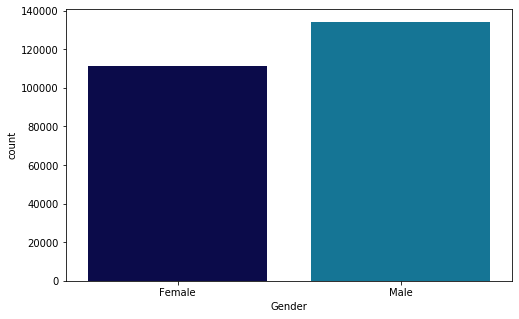

In [17]:
plt.figure(figsize=(8,5))
sns.countplot('Gender',data=train,palette='ocean')

__The Number of Male Customers is more as compared to Female.__

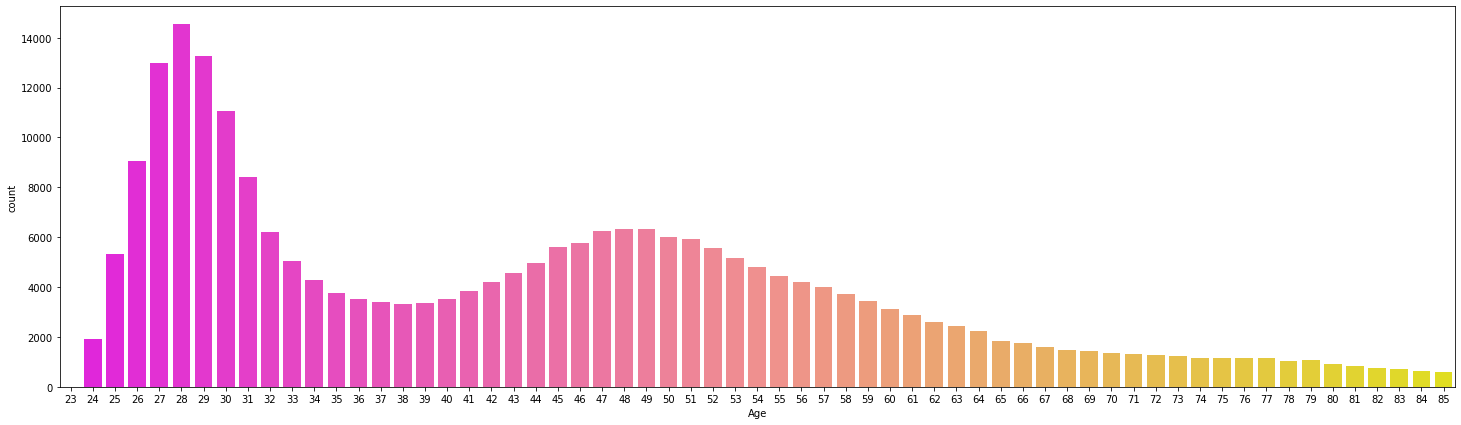

In [18]:
plt.figure(figsize=(25,7))
sns.countplot('Age',data=train,palette='spring')

__The Number of Customers are more in the age range between 26 to 31 yrs .__

In [19]:
train.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

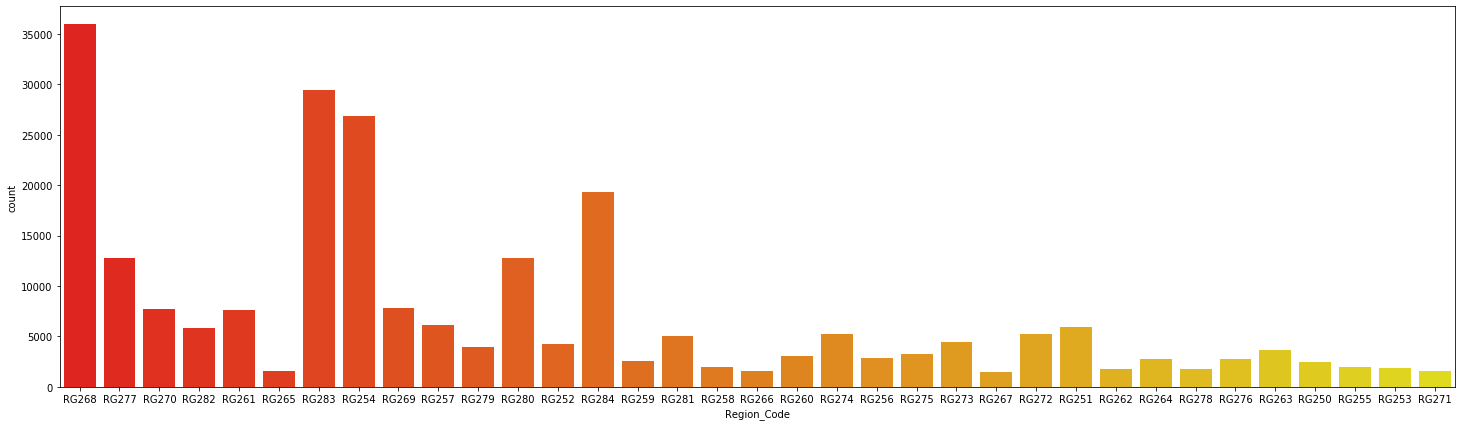

In [20]:
plt.figure(figsize=(25,7))
sns.countplot('Region_Code',data=train,palette='autumn')

__Regions RG268,RG283,RG254 & RG284 have more customers as compared to other regions.__

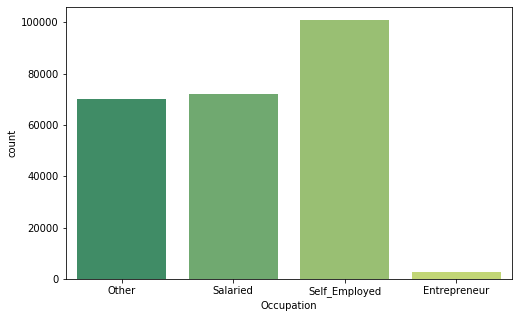

In [21]:
plt.figure(figsize=(8,5))
sns.countplot('Occupation',data=train,palette='summer')

__Maximum Customers are Self Employed.__

In [22]:
train['Channel_Code'].value_counts()

X1    103718
X3     68712
X2     67726
X4      5569
Name: Channel_Code, dtype: int64

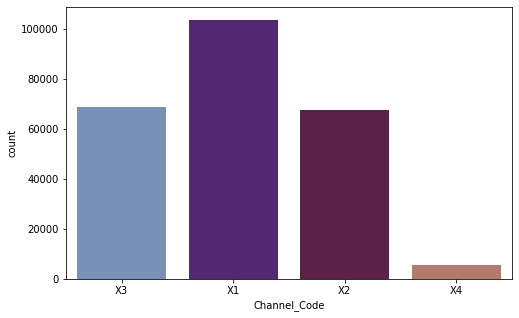

In [23]:
plt.figure(figsize=(8,5))
sns.countplot('Channel_Code',data=train,palette='twilight')

__Maximum Customers are acquired through 'X1' Channel Code.__

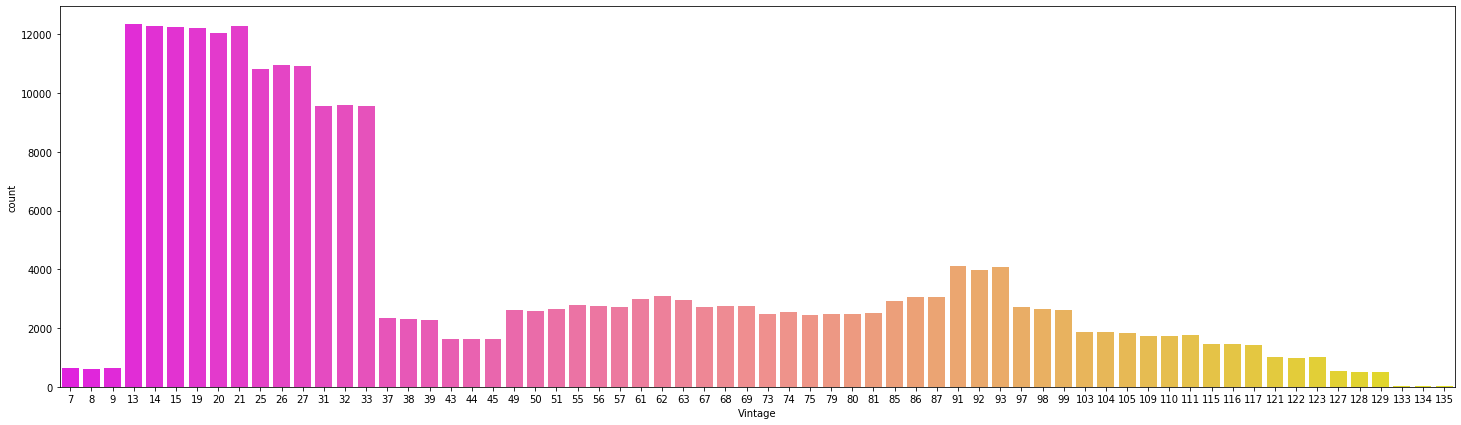

In [24]:
plt.figure(figsize=(25,7))
sns.countplot('Vintage',data=train,palette='spring')

__Most Customers are associated with the bank/entity for 13 to 33 months.__

In [25]:
train['Credit_Product'].value_counts()

No     173682
Yes     72043
Name: Credit_Product, dtype: int64

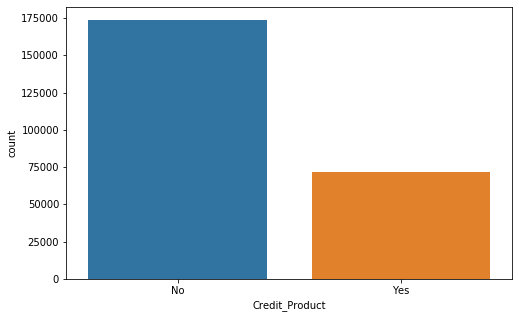

In [26]:
plt.figure(figsize=(8,5))
sns.countplot('Credit_Product',data=train)

__Most Customers don't have any active Credit Product .__

In [27]:
train['Avg_Account_Balance'].value_counts()

4022185    127
1611273     35
4126262     33
1142030     32
936814      31
          ... 
1016388      1
516680       1
1043017      1
784971       1
2760299      1
Name: Avg_Account_Balance, Length: 135292, dtype: int64

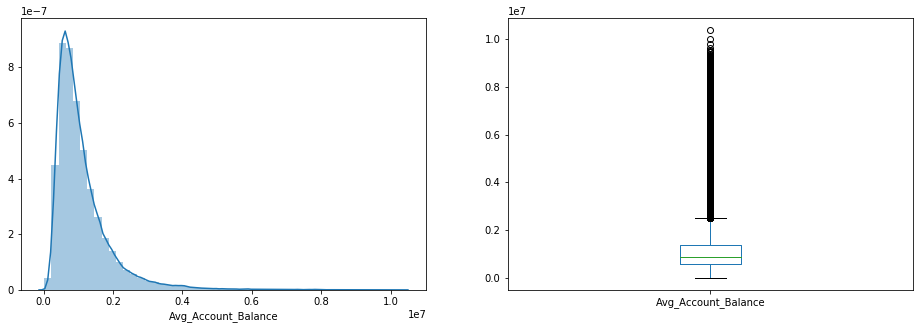

In [28]:
plt.figure(1)
plt.subplot(121) 
sns.distplot(train['Avg_Account_Balance']);
plt.subplot(122) 
train['Avg_Account_Balance'].plot.box(figsize=(16,5))
plt.show()

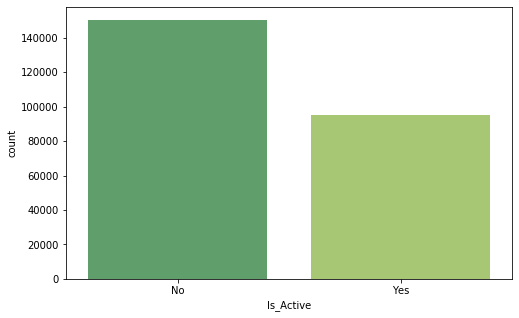

In [29]:
plt.figure(figsize=(8,5))
sns.countplot('Is_Active',data=train,palette='summer')

__Maximum Customers are not active for past 3 months.__

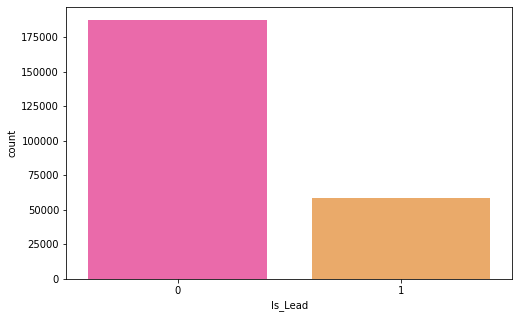

In [30]:
plt.figure(figsize=(8,5))
sns.countplot('Is_Lead',data=train,palette='spring')

__Maximum Customers are not interest in Credit Card.__

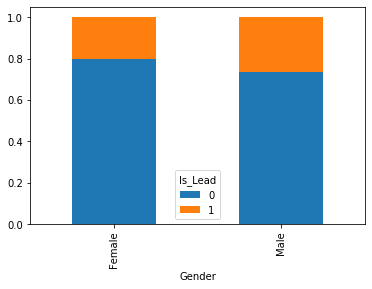

In [31]:
Gender = pd.crosstab(train['Gender'],train['Is_Lead'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

__More Male Customers are interest in Credit Card as compared to Female.__

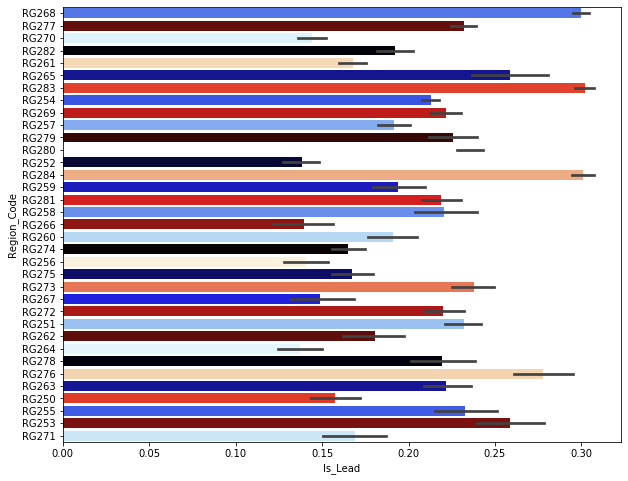

In [32]:
plt.figure(figsize=(10,8))
sns.barplot(y='Region_Code',x='Is_Lead',data=train,palette='flag')

__More Customers are interest in Credit Card from RG268,RG265,RG283,RG284,RG276,RG253.__

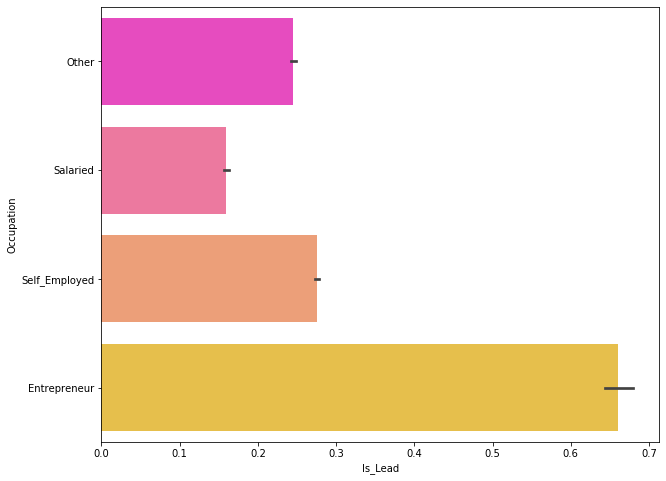

In [33]:
plt.figure(figsize=(10,8))
sns.barplot(y='Occupation',x='Is_Lead',data=train,palette='spring')

__While the number of Customers having 'Entreprener' occupation is less but they are more likely to be interested in Credit cards.__

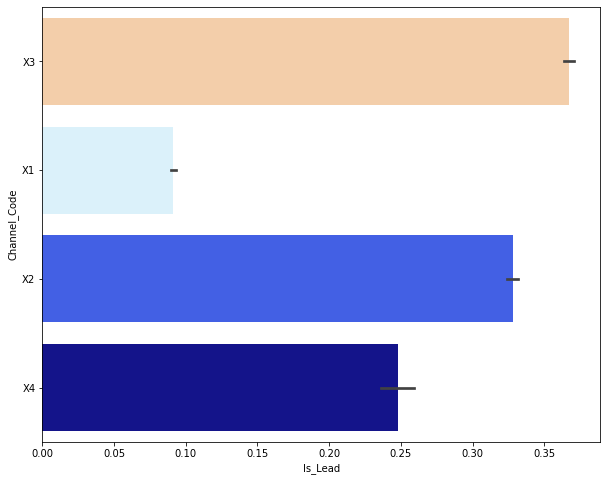

In [34]:
plt.figure(figsize=(10,8))
sns.barplot(y='Channel_Code',x='Is_Lead',data=train,palette='flag')

__Interested Credit Card Customers are acquired through 'X3' Channel Code.__

In [35]:
train.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

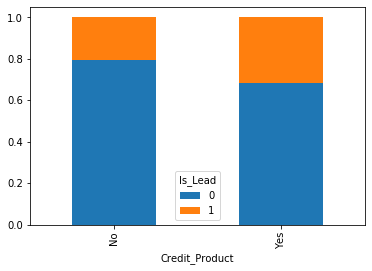

In [36]:
Gender = pd.crosstab(train['Credit_Product'],train['Is_Lead'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

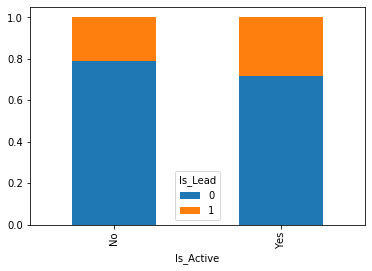

In [37]:
Gender = pd.crosstab(train['Is_Active'],train['Is_Lead'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

### Step 5: Building Model

In [38]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,r2_score,classification_report

In [39]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [40]:
train.drop(['ID'], axis=1, inplace=True)

In [41]:
train.columns

Index(['Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code', 'Vintage',
       'Credit_Product', 'Avg_Account_Balance', 'Is_Active', 'Is_Lead'],
      dtype='object')

In [42]:
train.select_dtypes(include='object').columns

Index(['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product',
       'Is_Active'],
      dtype='object')

In [43]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
var_mod = ['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product','Is_Active']
le = LabelEncoder()
for i in var_mod:
    train[i] = le.fit_transform(train[i])
    
#One Hot Coding:
train = pd.get_dummies(train, columns=['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product','Is_Active'])

In [45]:
#New variable for outlet
var_mod = ['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product','Is_Active']
le = LabelEncoder()
for i in var_mod:
    test[i] = le.fit_transform(test[i])
    
#One Hot Coding:
test = pd.get_dummies(test, columns=['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product','Is_Active'])

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 53 columns):
Age                    245725 non-null int64
Vintage                245725 non-null int64
Avg_Account_Balance    245725 non-null int64
Is_Lead                245725 non-null int64
Gender_0               245725 non-null uint8
Gender_1               245725 non-null uint8
Region_Code_0          245725 non-null uint8
Region_Code_1          245725 non-null uint8
Region_Code_2          245725 non-null uint8
Region_Code_3          245725 non-null uint8
Region_Code_4          245725 non-null uint8
Region_Code_5          245725 non-null uint8
Region_Code_6          245725 non-null uint8
Region_Code_7          245725 non-null uint8
Region_Code_8          245725 non-null uint8
Region_Code_9          245725 non-null uint8
Region_Code_10         245725 non-null uint8
Region_Code_11         245725 non-null uint8
Region_Code_12         245725 non-null uint8
Region_Code_13         245725 non-

In [48]:
# Seperate Features and Target
X= train.drop(columns = ['Is_Lead'], axis=1)
y= train['Is_Lead']

In [49]:
# 20% data as validation set
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=22)

In [50]:
X_train.shape,y_train.shape

((196580, 52), (196580,))

## 1. Logistic Regression Model

In [51]:
# Model Building

# Initialzing the model
lreg_model = LogisticRegression()

# Fitting the model with data
lreg_model.fit(X_train, y_train)

# Predicting on test data
y_pred = lreg_model.predict(X_valid)


In [52]:
y_pred_prob = lreg_model.predict_proba(X_valid)[:,1]

In [53]:
roc_auc_score(y_valid,y_pred)

0.5

In [54]:
roc_auc_score(y_valid,y_pred_prob)

0.44915201063524335

## 2. Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

# Initialzing the model
rf_model = RandomForestClassifier()

# Fitting the model with data
rf_model.fit(X_train, y_train)

# Predicting on test data
y_pred = rf_model.predict(X_valid)

# Evaluating the model
print('----------------ROC Score-------------------')
print(roc_auc_score(y_valid, y_pred))


print("-------------Classification Report -----------------")
print(classification_report(y_pred, y_valid))

----------------ROC Score-------------------
0.6174514966188559
-------------Classification Report -----------------
              precision    recall  f1-score   support

           0       0.92      0.81      0.86     42280
           1       0.32      0.54      0.40      6865

    accuracy                           0.77     49145
   macro avg       0.62      0.68      0.63     49145
weighted avg       0.83      0.77      0.80     49145



Feature ranking:
1. feature Age (0.288557)
2. feature Vintage (0.217926)
3. feature Avg_Account_Balance (0.205930)
4. feature Gender_0 (0.033912)
5. feature Gender_1 (0.022160)
6. feature Region_Code_0 (0.014011)
7. feature Region_Code_1 (0.012054)
8. feature Region_Code_2 (0.010046)
9. feature Region_Code_3 (0.010018)
10. feature Region_Code_4 (0.008924)
11. feature Region_Code_5 (0.008748)
12. feature Region_Code_6 (0.008283)
13. feature Region_Code_7 (0.008047)
14. feature Region_Code_8 (0.007796)
15. feature Region_Code_9 (0.007773)
16. feature Region_Code_10 (0.007727)
17. feature Region_Code_11 (0.007601)
18. feature Region_Code_12 (0.007388)
19. feature Region_Code_13 (0.007293)
20. feature Region_Code_14 (0.006512)
21. feature Region_Code_15 (0.006267)
22. feature Region_Code_16 (0.005845)
23. feature Region_Code_17 (0.005157)
24. feature Region_Code_18 (0.004615)
25. feature Region_Code_19 (0.004255)
26. feature Region_Code_20 (0.004137)
27. feature Region_Code_21 (0.004086)
2

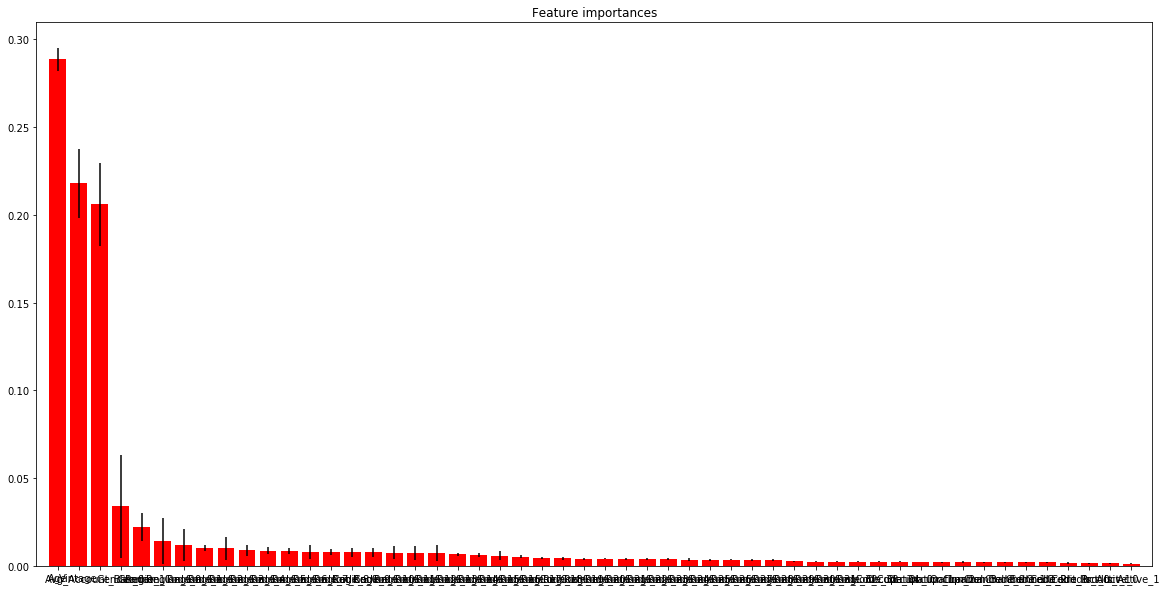

In [56]:
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, list(X_train.columns)[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), list(X_train.columns))
plt.xlim([-1, X_train.shape[1]])
plt.show()

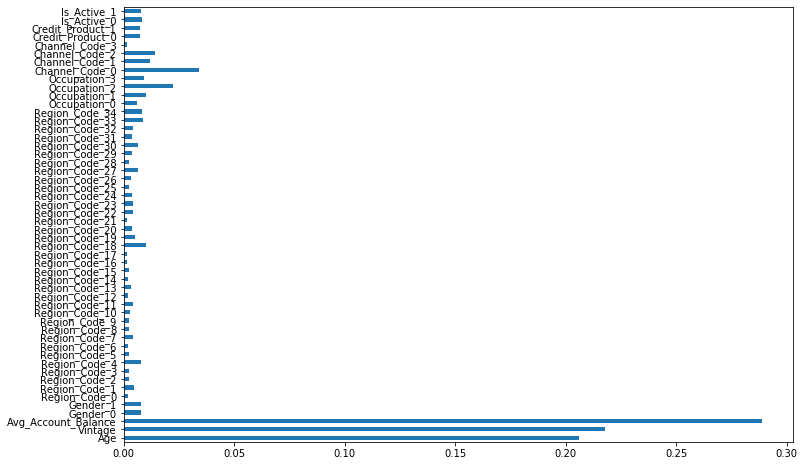

In [57]:
importances = pd.Series(rf_model.feature_importances_,index=X_train.columns)
importances.plot(kind='barh',figsize=(12,8))

In [58]:
y_pred_prob = rf_model.predict_proba(X_valid)[:,1]
roc_auc_score(y_valid, y_pred_prob)

0.750485571648923

## XG Boost

In [59]:
from xgboost.sklearn import XGBClassifier

# Initialzing the model
xgb_model = XGBClassifier()

# Fitting the model with data
xgb_model.fit(X_train, y_train)

# Predicting on test data
y_pred = xgb_model.predict(X_valid)
y_pred_prob = xgb_model.predict_proba(X_valid)[:,1]

# Evaluating the model
print('----------------ROC Score-------------------')
print(roc_auc_score(y_valid, y_pred))

print('----------------ROC Score Probability-------------------')
print(roc_auc_score(y_valid, y_pred_prob))


print("-------------Classification Report -----------------")
print(classification_report(y_pred, y_valid))

----------------ROC Score-------------------
0.6155644317357183
----------------ROC Score Probability-------------------
0.7869341679565972
-------------Classification Report -----------------
              precision    recall  f1-score   support

           0       0.95      0.81      0.87     44094
           1       0.28      0.65      0.39      5051

    accuracy                           0.79     49145
   macro avg       0.62      0.73      0.63     49145
weighted avg       0.88      0.79      0.82     49145



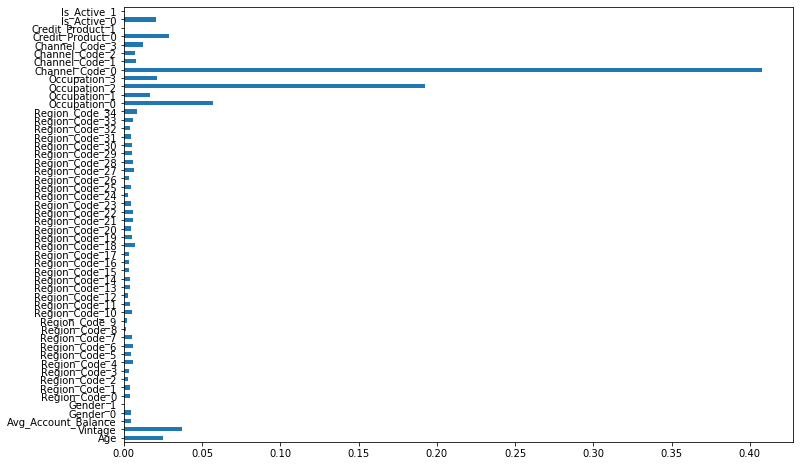

In [60]:
importances = pd.Series(xgb_model.feature_importances_,index=X_train.columns)
importances.plot(kind='barh',figsize=(12,8))

## XGBRFClassifier

In [61]:
from xgboost.sklearn import XGBRFClassifier

# Initialzing the model
xgbrf_model = XGBRFClassifier()

# Fitting the model with data
xgbrf_model.fit(X_train, y_train)

# Predicting on test data
y_pred = xgbrf_model.predict(X_valid)
y_pred_prob = xgbrf_model.predict_proba(X_valid)[:,1]

# Evaluating the model
print('----------------ROC Score-------------------')
print(roc_auc_score(y_valid, y_pred))

print('----------------ROC Score Probability-------------------')
print(roc_auc_score(y_valid, y_pred_prob))


print("-------------Classification Report -----------------")
print(classification_report(y_pred, y_valid))

----------------ROC Score-------------------
0.5571948028813177
----------------ROC Score Probability-------------------
0.7805153876959862
-------------Classification Report -----------------
              precision    recall  f1-score   support

           0       0.99      0.78      0.88     47488
           1       0.12      0.85      0.21      1657

    accuracy                           0.79     49145
   macro avg       0.56      0.82      0.54     49145
weighted avg       0.96      0.79      0.85     49145



In [62]:
submission = pd.read_csv('sample_submission_eyYijxG.csv')
xgb_model.fit(X, y)
final_predictions = xgb_model.predict_proba(test.drop(columns = ['ID'], axis=1))[:,1]
submission['Is_Lead'] = final_predictions
#only positive predictions for the target variable
submission['Is_Lead'] = submission['Is_Lead'].apply(lambda x: 0 if x<0 else x)
submission.to_csv('my_submission4.csv', index=False)